Aplicação da Regressão Linear (Mercado Financeiro)

In [736]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt

In [737]:
ticker = "BBAS3.SA"
data = yf.Ticker(ticker).history(period="2y")

del data["Dividends"]
del data["Stock Splits"]

data.dropna()

data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-07-04 00:00:00-03:00,14.357675,14.409711,14.223248,14.327321,10339200
2022-07-05 00:00:00-03:00,14.253602,14.318648,14.023776,14.249267,17375800
2022-07-06 00:00:00-03:00,14.171212,14.344667,13.963067,14.158203,21683600
2022-07-07 00:00:00-03:00,14.288293,14.479092,14.288293,14.366347,19425200
2022-07-08 00:00:00-03:00,14.383694,14.587503,14.335995,14.505113,17998200


In [738]:
# Definindo correlação 

correlacao = pd.DataFrame(data)

correlacao_aplicada = correlacao.corr()

# Definindo X e y
X = data['Open'].values
y = data['High'].values

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

correlacao_aplicada

,Open,High,Low,Close,Volume
Open,1.000000,0.999094,0.998962,0.962593,-0.351873
High,0.999094,1.000000,0.998959,0.963112,-0.338611
Low,0.998962,0.998959,1.000000,0.964537,-0.362871
Close,0.962593,0.963112,0.964537,1.000000,-0.374565
Volume,-0.351873,-0.338611,-0.362871,-0.374565,1.000000


Text(0, 0.5, 'High')

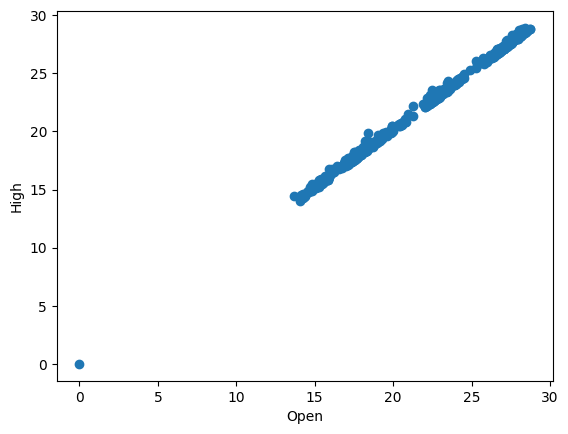

In [739]:
# Mostrar o espalhamento dos dados

plt.scatter(X, y)
plt.xlabel('Open')
plt.ylabel('High')

In [740]:
df = pd.DataFrame(data)

# Calcular a média e o desvio padrão
mean = df['Open'].mean()
std = df['Open'].std()

# Definir o limite para outliers
cutoff = 3 * std

# Identificar valores que são menores que mean - cutoff ou maiores que mean + cutoff
outliers_open = df[(df['Open'] < mean - cutoff) | (df['Open'] > mean + cutoff)]

# Resultado
print("Outliers detectados (Open):")
print(outliers_open)

outliers_indices = outliers_open.index
df.drop(outliers_indices)


Outliers detectados (Open):
                           Open  High  Low      Close  Volume
Date                                                         
2024-07-03 00:00:00-03:00   0.0   0.0  0.0  26.709999       0


,Open,High,Low,Close,Volume
Date,,,,,
2022-07-04 00:00:00-03:00,14.357675,14.409711,14.223248,14.327321,10339200
2022-07-05 00:00:00-03:00,14.253602,14.318648,14.023776,14.249267,17375800
2022-07-06 00:00:00-03:00,14.171212,14.344667,13.963067,14.158203,21683600
2022-07-07 00:00:00-03:00,14.288293,14.479092,14.288293,14.366347,19425200
2022-07-08 00:00:00-03:00,14.383694,14.587503,14.335995,14.505113,17998200
...,...,...,...,...,...
2024-06-26 00:00:00-03:00,26.900000,26.900000,26.469999,26.709999,15089500
2024-06-27 00:00:00-03:00,26.790001,26.820000,26.410000,26.700001,17283200
2024-06-28 00:00:00-03:00,26.700001,26.740000,26.459999,26.709999,15567200


In [741]:
# Definindo X e y
X = df['Open'].values
y = df['High'].values

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

Text(0, 0.5, 'High')

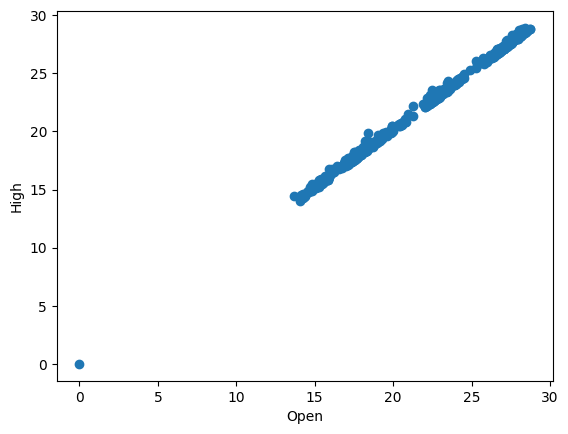

In [742]:
# Mostrar o espalhamento dos dados

plt.scatter(X, y)
plt.xlabel('Open')
plt.ylabel('High')

In [743]:
# Treinamento

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [744]:
# Normalizando os dados

x_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train_scaled = x_scaler.fit_transform(X_train)
X_test_scaled = x_scaler.transform(X_test)
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [745]:
# Calculo da Regressão Linear

modelo_regressao = LinearRegression()

modelo_regressao.fit(X_train, y_train)

LinearRegression()

In [746]:
# Realizar Previsões

y_pred = modelo_regressao.predict(X_test)
y_pred

array([[16.47606211],
       [23.6375631 ],
       [22.51300296],
       [27.74528339],
       [27.77443711],
       [15.23135586],
       [22.60795338],
       [26.29341968],
       [19.09542184],
       [18.02202915],
       [23.73555554],
       [23.82421137],
       [27.58537505],
       [22.63052569],
       [18.37685905],
       [23.70421143],
       [27.18163244],
       [26.24380135],
       [17.76477134],
       [18.35193596],
       [19.95160553],
       [26.53765468],
       [23.77755017],
       [15.93998887],
       [18.92913749],
       [27.95908238],
       [15.72797871],
       [26.67222358],
       [15.39694331],
       [21.50831335],
       [27.81330763],
       [15.43612825],
       [15.75992597],
       [18.23003004],
       [26.59052344],
       [26.81127481],
       [22.37440238],
       [27.13304317],
       [25.4939958 ],
       [23.56756975],
       [23.83766809],
       [17.80511363],
       [28.3543404 ],
       [20.16622773],
       [18.61684001],
       [14

Text(0, 0.5, 'High')

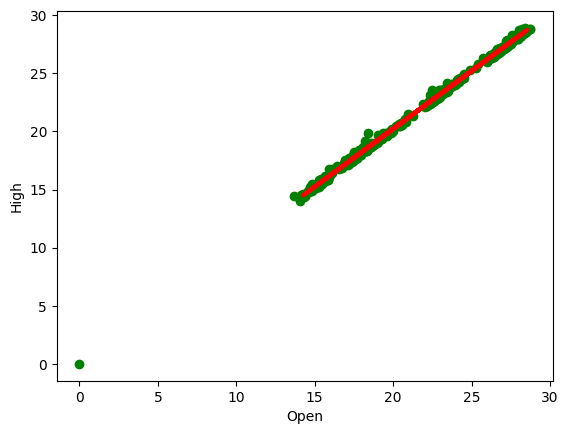

In [747]:
# Mostrando os resultados Reais X Predições

plt.scatter(X_train, y_train, color='green', label='Valores Real')
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Predições')
plt.xlabel('Open')
plt.ylabel('High')

In [748]:
# Calculando métricas de avaliação usando os valores na escala original

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # multiplicando por 100 para converter em porcentagem

# Exibindo as métricas
print(f"Coeficiente de Determinação (R2): {r2}")
print(f"Erro Médio Absoluto (MAE): {mae}")
print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Erro Percentual Absoluto Médio (MAPE): {mape}%")

Coeficiente de Determinação (R2): 0.9975507666745103
Erro Médio Absoluto (MAE): 0.15447841650816682
Erro Quadrático Médio (MSE): 0.04356233245751895
Erro Percentual Absoluto Médio (MAPE): 0.7239343911305092%


In [749]:
# Aplicando a tecnica KFold para melhorar o MAE e o MSE

kf = KFold(n_splits=30, shuffle=True, random_state=42)

In [750]:
# Calculando métricas de avaliação usando os valores na escala original (pós Kfolding)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # multiplicando por 100 para converter em porcentagem

# Exibindo as métricas
print(f"Coeficiente de Determinação (R2): {r2}")
print(f"Erro Médio Absoluto (MAE): {mae}")
print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Erro Percentual Absoluto Médio (MAPE): {mape}%")

Coeficiente de Determinação (R2): 0.9975507666745103
Erro Médio Absoluto (MAE): 0.15447841650816682
Erro Quadrático Médio (MSE): 0.04356233245751895
Erro Percentual Absoluto Médio (MAPE): 0.7239343911305092%
